## Spotify Analysis Dataset 2025


link https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis

## Imports

In [13]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load The Data

In [14]:
# Download latest version
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spotify-dataset-for-churn-analysis' dataset.
Path to dataset files: /kaggle/input/spotify-dataset-for-churn-analysis


In [15]:
print(os.listdir(path))

['spotify_churn_dataset.csv']


In [16]:
df = pd.read_csv(os.path.join(path,'spotify_churn_dataset.csv'))

## Explore the Data

In [17]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(8000, 12)

## Preprocessing

In [21]:
df['gender']= df['gender'].astype('category').cat.codes

In [22]:
df['country'].unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [23]:
cat_cols = ['country', 'device_type','subscription_type']

# 1️⃣ Create dummies for those columns
dummy = pd.get_dummies(df[cat_cols], drop_first=False).astype(int)

# 2️⃣ Concatenate them back with the original df
df = pd.concat([df, dummy], axis=1)

# 3️⃣ Drop the original categorical columns
df = df.drop(cat_cols, axis=1)

df.head()


,user_id,gender,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,country_AU,...,country_PK,country_UK,country_US,device_type_Desktop,device_type_Mobile,device_type_Web,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student
0,1,0,54,26,23,0.20,31,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,2,2,33,141,62,0.34,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,1,38,199,38,0.04,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3,4,0,22,36,2,0.31,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,2,29,250,57,0.36,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0


## Visualization

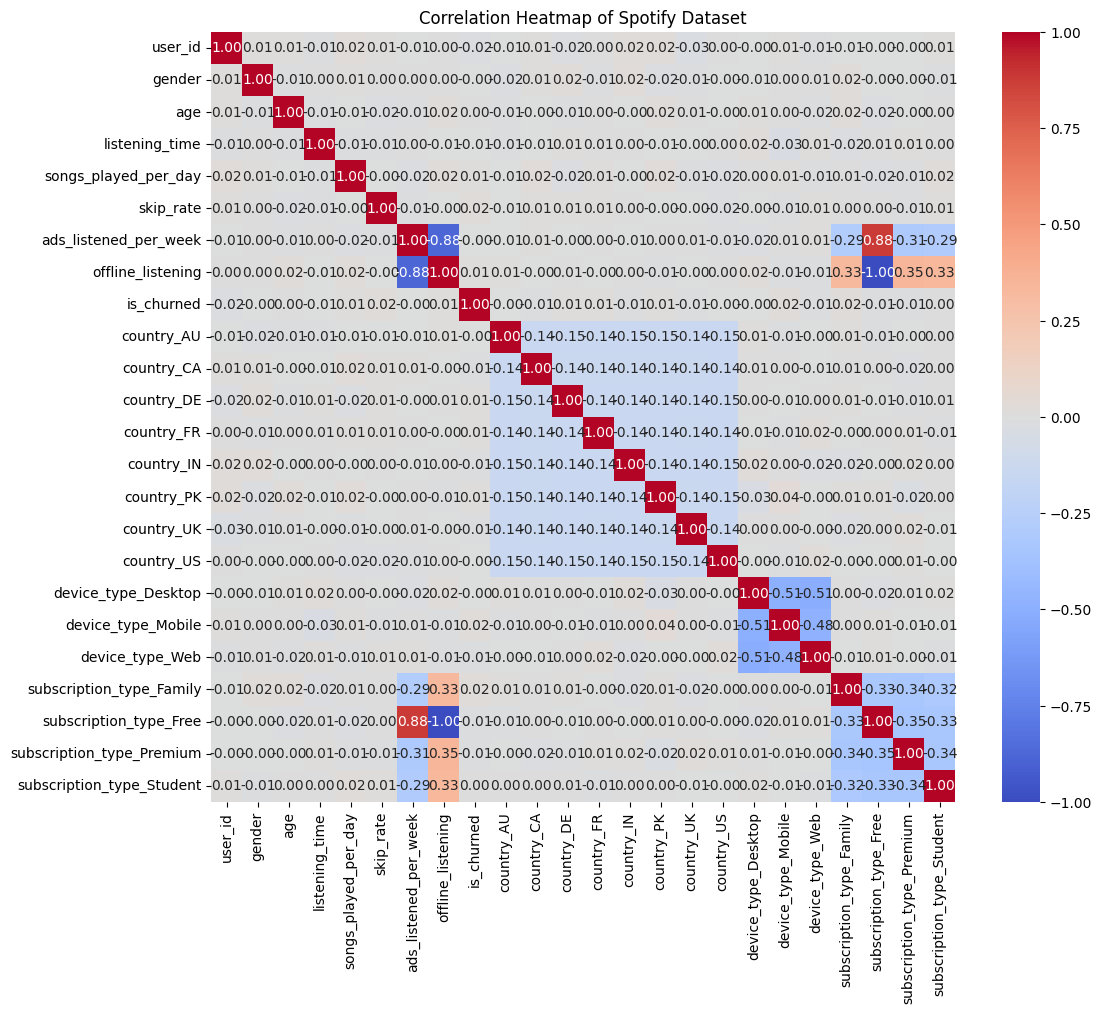

In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spotify Dataset')
plt.show()

## Train Test Split

In [40]:
df["is_churned"].value_counts()

,count
is_churned,
0,5929
1,2071


In [25]:
df.head()

,user_id,gender,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,country_AU,...,country_PK,country_UK,country_US,device_type_Desktop,device_type_Mobile,device_type_Web,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student
0,1,0,54,26,23,0.20,31,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,2,2,33,141,62,0.34,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,1,38,199,38,0.04,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3,4,0,22,36,2,0.31,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,2,29,250,57,0.36,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0


In [26]:
drop_cols = ["user_id","is_churned"]
X = df.drop(drop_cols,axis=1)
y = df["is_churned"]

In [27]:
X

,gender,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,country_AU,country_CA,country_DE,...,country_PK,country_UK,country_US,device_type_Desktop,device_type_Mobile,device_type_Web,subscription_type_Family,subscription_type_Free,subscription_type_Premium,subscription_type_Student
0,0,54,26,23,0.20,31,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,2,33,141,62,0.34,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,1,38,199,38,0.04,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,22,36,2,0.31,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2,29,250,57,0.36,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2,44,237,36,0.30,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7996,1,34,61,64,0.59,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
7997,0,17,81,62,0.33,5,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
7998,0,34,245,94,0.27,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
y

,is_churned
0,1
1,0
2,1
3,0
4,1
...,...
7995,1
7996,0
7997,0
7998,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(

                                                    X,y,
                                                    train_size=0.75,
                                                    random_state= 42
)

In [30]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Basic Models


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {"accuracy": accuracy, "confusion_matrix": cm}

    print(f"{name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

Logistic Regression
Accuracy: 0.7480
Confusion Matrix:
[[1496    0]
 [ 504    0]]


Decision Tree
Accuracy: 0.6060
Confusion Matrix:
[[1057  439]
 [ 349  155]]


Random Forest
Accuracy: 0.7440
Confusion Matrix:
[[1480   16]
 [ 496    8]]


Gradient Boosting
Accuracy: 0.7465
Confusion Matrix:
[[1492    4]
 [ 503    1]]


SVC
Accuracy: 0.7480
Confusion Matrix:
[[1496    0]
 [ 504    0]]


KNeighbors
Accuracy: 0.7015
Confusion Matrix:
[[1348  148]
 [ 449   55]]


Gaussian NB
Accuracy: 0.7480
Confusion Matrix:
[[1496    0]
 [ 504    0]]




## Stacking and Voting

In [32]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True)), # probability=True is needed for VotingClassifier soft voting
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]

In [33]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=base_models, voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('nb', GaussianNB())],
                 voting='soft')

## Evaluate voting classifier

In [34]:
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
cm_voting = confusion_matrix(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

print("Voting Classifier Performance:")
print(f"Accuracy: {accuracy_voting:.4f}")
print("Confusion Matrix:")
print(cm_voting)
print("Classification Report:")
print(report_voting)

Voting Classifier Performance:
Accuracy: 0.7470
Confusion Matrix:
[[1494    2]
 [ 504    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1496
           1       0.00      0.00      0.00       504

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000



In [35]:
from sklearn.ensemble import StackingClassifier

final_estimator = GradientBoostingClassifier(random_state=42)

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('nb', GaussianNB())],
                   final_estimator=GradientBoostingClassifier(random_state=42))

## Evaluate stacking classifier


In [36]:
y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print("Stacking Classifier Performance:")
print(f"Accuracy: {accuracy_stacking:.4f}")
print("Confusion Matrix:")
print(cm_stacking)
print("Classification Report:")
print(report_stacking)

Stacking Classifier Performance:
Accuracy: 0.7480
Confusion Matrix:
[[1494    2]
 [ 502    2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1496
           1       0.50      0.00      0.01       504

    accuracy                           0.75      2000
   macro avg       0.62      0.50      0.43      2000
weighted avg       0.69      0.75      0.64      2000



## Compare ensemble models



In [37]:
model_accuracies = {}

for name, result in results.items():
    model_accuracies[name] = result["accuracy"]

model_accuracies["Voting Classifier"] = accuracy_voting
model_accuracies["Stacking Classifier"] = accuracy_stacking

accuracy_comparison = pd.Series(model_accuracies).sort_values(ascending=False)

print("Model Accuracy Comparison (Sorted by Accuracy):")
display(accuracy_comparison)

Model Accuracy Comparison (Sorted by Accuracy):


,0
Logistic Regression,0.7480
SVC,0.7480
Gaussian NB,0.7480
Stacking Classifier,0.7480
Voting Classifier,0.7470
Gradient Boosting,0.7465
Random Forest,0.7440
KNeighbors,0.7015
Decision Tree,0.6060


## NN's

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert target variable to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Neural Network Accuracy: {accuracy:.4f}")

# Predict and display confusion matrix (requires inverse transform on y_pred)
y_pred_nn_encoded = model.predict(X_test)
y_pred_nn = tf.argmax(y_pred_nn_encoded, axis=1).numpy()

cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(cm_nn)

print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.6805
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Confusion Matrix:
[[1279  217]
 [ 422   82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1496
           1       0.27      0.16      0.20       504

    accuracy                           0.68      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.63      0.68      0.65      2000



In [41]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, average_precision_score

neg, pos = (y==0).sum(), (y==1).sum()
scale_pos_weight = neg / pos   # ≈ 2.86

cbc = CatBoostClassifier(
    iterations=700,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=8,
    subsample=0.8,
    rsm=0.8,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=scale_pos_weight,
    random_seed=42,
    verbose=0
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
proba = cross_val_predict(cbc, X, y, cv=cv, method='predict_proba')[:,1]

print("ROC-AUC :", roc_auc_score(y, proba))
print("PR-AUC  :", average_precision_score(y, proba))


ROC-AUC : 0.5135577861282866
PR-AUC  : 0.2673963014462069


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
rf = RandomForestClassifier(n_estimators=300, random_state=42)
cv = StratifiedKFold(5, shuffle=True, random_state=42)
print("RF AUC:", cross_val_score(rf, X, y, cv=cv, scoring='roc_auc').mean())


RF AUC: 0.5112487959661209


RF AUC: 0.5112487959661209  it means data set can't explain our targets